In [3]:
import matplotlib.pyplot as plt
import numpy as np
import json, urllib
from datetime import datetime
import matplotlib.ticker as  mt

def fractions(init, d):
    '''calculate the abscissa in year fractions'''
    year= d.year
    year1st= dt.datetime(year,1,1)
    span =dt.datetime(year+1,1,1)-year1st
    frac = (d-year1st)/span
    Ys= year-init
    return Ys+frac

#read json
# url = "https://www.plasticatbay.org/ChartBal/BeachData.php"
# user_agent = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.19 (KHTML, like Gecko) Ubuntu/12.04 Chromium/18.0.1025.168 Chrome/18.0.1025.168 Safari/535.19'

# webdata= urllib.request.urlopen(url, timeout=120).read()
# print('webdata: ', webdata)
# encoding=url.info().get_content_charset('utf-8')
workdir='/home/julien/DATA/Marine_plastics/PlasticsATBay/Simulations/plastic/'
backup=workdir+'WeightData_27-12-21.json'
data = json.loads(open(backup).read())
print(data[2]['data'])

[{'Id': '1235', 'RecordNb': '1', 'Beach': 'Ard Neackie', 'Lat': '58.4976', 'Longit': '-4.66321', 'Weight': '1000', 'Dates': '2018-11-28', 'team': 'Pentland Canoe Club', 'person': 'someemail'}, {'Id': '4', 'RecordNb': '0', 'Beach': 'Balnakeil', 'Lat': '58.5802', 'Longit': '-4.76575', 'Weight': '500', 'Dates': '2017-05-04', 'team': 'PlasticatBay', 'person': 'Julien'}, {'Id': '5', 'RecordNb': '0', 'Beach': 'Balnakeil', 'Lat': '58.5802', 'Longit': '-4.76575', 'Weight': '7.4', 'Dates': '2017-05-08', 'team': 'PlasticatBay', 'person': 'Julien'}, {'Id': '6', 'RecordNb': '0', 'Beach': 'Balnakeil', 'Lat': '58.5802', 'Longit': '-4.76575', 'Weight': '6.4', 'Dates': '2017-05-13', 'team': 'PlasticatBay', 'person': 'Julien'}, {'Id': '7', 'RecordNb': '0', 'Beach': 'Balnakeil', 'Lat': '58.5802', 'Longit': '-4.76575', 'Weight': '8.7', 'Dates': '2017-05-21', 'team': 'PlasticatBay', 'person': 'Julien'}, {'Id': '8', 'RecordNb': '0', 'Beach': 'Balnakeil', 'Lat': '58.5802', 'Longit': '-4.76575', 'Weight': '1

### extract the data

In [4]:
#dates, weight =[],[]
from collections import OrderedDict
stats=OrderedDict()
for entry in data[2]['data']:
    if not entry["Beach"] in stats.keys():
        stats[entry["Beach"]]={'weight':[float(entry["Weight"])],'date':[datetime.fromisoformat(entry["Dates"])],
                               'total':float(entry["Weight"]), 'entries':1,'team':entry["team"]}
    else:
        stats[entry["Beach"]]['weight'].append(float(entry["Weight"]))
        stats[entry["Beach"]]['date'].append(datetime.fromisoformat(entry["Dates"]))
        stats[entry["Beach"]]['total'] += float(entry["Weight"])
        stats[entry["Beach"]]['entries'] +=1

### Calculate some stats for the beaches with most records

In [5]:

%matplotlib notebook
names=np.array(list(stats.keys()))
totals=np.array([stats[k]['total'] for k in stats.keys()])
entries=np.array([stats[k]['entries'] for k in stats.keys()])
n=20 # nb of cleans recorded
filt=entries>n
subtot=totals[filt]
subentr=entries[filt]
subnames=names[filt]
itot=np.argsort(subtot)[::-1]
ient=np.argsort(subentr)[::-1]

<IPython.core.display.Javascript object>


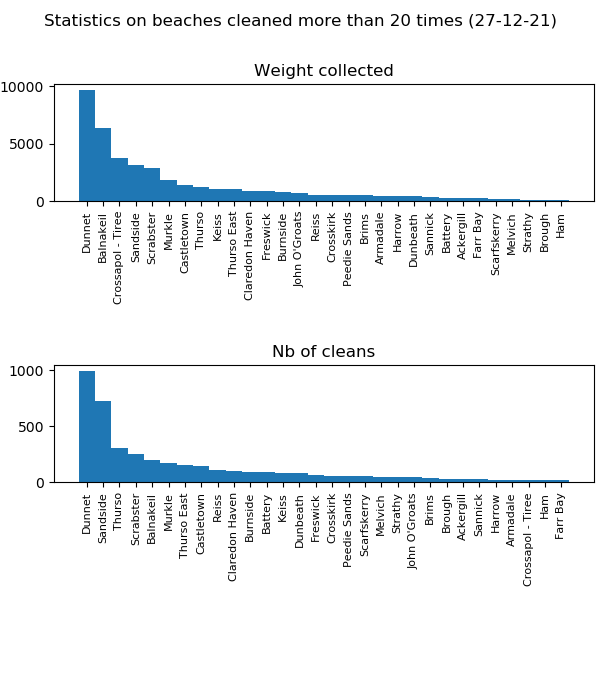

<ipython-input-125-efec7989e4c7>:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig_stat.tight_layout()


In [125]:
from matplotlib.gridspec import GridSpec
fig_stat =plt.figure(figsize=(6,7))
fig_stat.suptitle('Statistics on beaches cleaned more than {} times (27-12-21)'.format(n))
gs1 = GridSpec(4, 1, left=0.09, right=0.99, wspace=0.01)
ax_stat1 = fig_stat.add_subplot(gs1[0])
ax_stat2 = fig_stat.add_subplot(gs1[2])
ax_stat1.bar(subnames[itot], subtot[itot], align='center', width=1.0)
ax_stat2.bar(subnames[ient], subentr[ient], align='center', width=1.0)
ax_stat2.tick_params(axis='x', rotation=90, labelsize=8)
ax_stat1.tick_params(axis='x', rotation=90, labelsize=8)
ax_stat1.set_ylabel('Weight in kg')
ax_stat1.set_title('Weight collected')
ax_stat2.set_title('Nb of cleans')
fig_stat.tight_layout()

### displaying a comparative evolution in the 8 best beach dataset

<IPython.core.display.Javascript object>


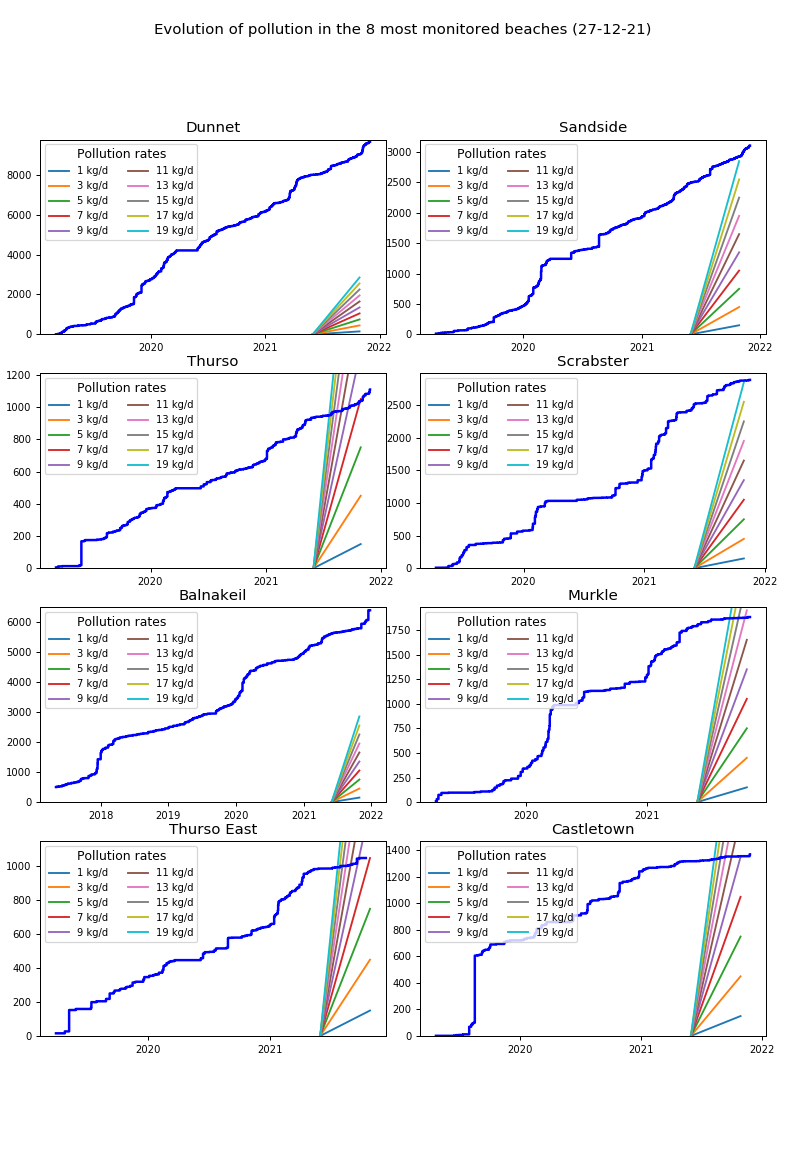

<ipython-input-282-5963aa11f132>:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig_sel.tight_layout()


In [282]:
from datetime import timedelta
import matplotlib.dates as mdates 

def mk_bar(beach):
    start_date, end_date=stats[beach]['date'][0], stats[beach]['date'][-1]    
    dates=np.arange(start_date, end_date,timedelta(days=0.5))
    cumweight=np.zeros_like(dates, dtype=np.float)
    for d in range(len(stats[beach]['date'])):
        locate = dates >= stats[beach]['date'][d]
        cumweight[locate] += stats[beach]['weight'][d]
    return dates, cumweight
    
    
selected = subnames[ient][:8]
fig_sel =plt.figure(figsize=(9,13))
fig_sel.suptitle('Evolution of pollution in the 8 most monitored beaches (27-12-21)')
nrows, ncols=4,2
gs2 = GridSpec(nrows, ncols, left=0.05, right=0.95, wspace=0.1)
plots=[]
# make something to visualise the pollution rates
o_date=datetime(year=2021, month=6, day=1)
rate=150
e_date=o_date+timedelta(days=rate)
rates=np.array([[o_date, e_date],[0,rate]])
for i in range(nrows):
    for j in range(ncols):
        plots.append((fig_sel.add_subplot(gs2[i,j])))
for p in range(len(selected)):
    X,Y=mk_bar(selected[p])
    for s in range(1,20,2):
        plots[p].plot(rates[0],rates[1]*s, label='{} kg/d'.format(s))
    plots[p].step(X,Y, 'b', linewidth=2)
    plots[p].set_title(selected[p])
    plots[p].tick_params(axis='x',labelsize=8)
    locator=mdates.YearLocator()
    plots[p].xaxis.set_major_locator(locator)
    plots[p].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plots[p].tick_params(axis='y',labelsize=8)
    plots[p].legend(loc='upper left', ncol=2, fontsize=8, title='Pollution rates')
    plots[p].set_ylim(0,Y[-1]+100)

fig_sel.tight_layout()  

### Plastic@Bay records

<IPython.core.display.Javascript object>


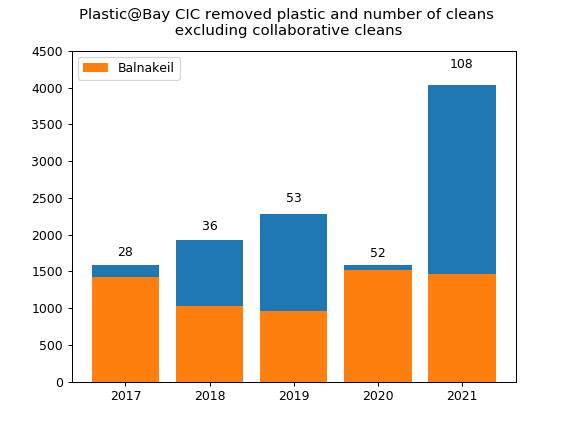

In [15]:
import numpy as np
def autolabel(ax, rects, label):
    """
    Attach a text label above each bar displaying its height
    """
    for i in range(len(rects)):
        height = rects[i].get_height()
        ax.text(rects[i].get_x() + rects[i].get_width()/2., 1.05*height,
                str(label[i]),
                ha='center', va='bottom')

years =np.arange(2017,2022)
totalc=np.zeros(len(years))
total_baln=np.zeros(len(years))
Nbs = np.zeros(len(years),dtype=np.int)

for beach in names:
    if stats[beach]['team'] == 'PlasticatBay':
        for i in range(len(stats[beach]['weight'])):
            buff= stats[beach]['weight'][i]
            totalc[years==stats[beach]['date'][i].year]+= buff
            if beach=='Balnakeil':
                total_baln[years==stats[beach]['date'][i].year]+= buff
            
            Nbs[years==stats[beach]['date'][i].year] +=1
fig_year,ax_y = plt.subplots()
fig_year.suptitle('Plastic@Bay CIC removed plastic and number of cleans\n excluding collaborative cleans')
barbar= ax_y.bar(years,totalc)
ax_y.bar(years,total_baln, label='Balnakeil')
autolabel(ax_y, barbar, Nbs)
ax_y.set_ylim(0,4500)
ax_y.legend(loc='upper left')

### Conor monitoring data

<IPython.core.display.Javascript object>


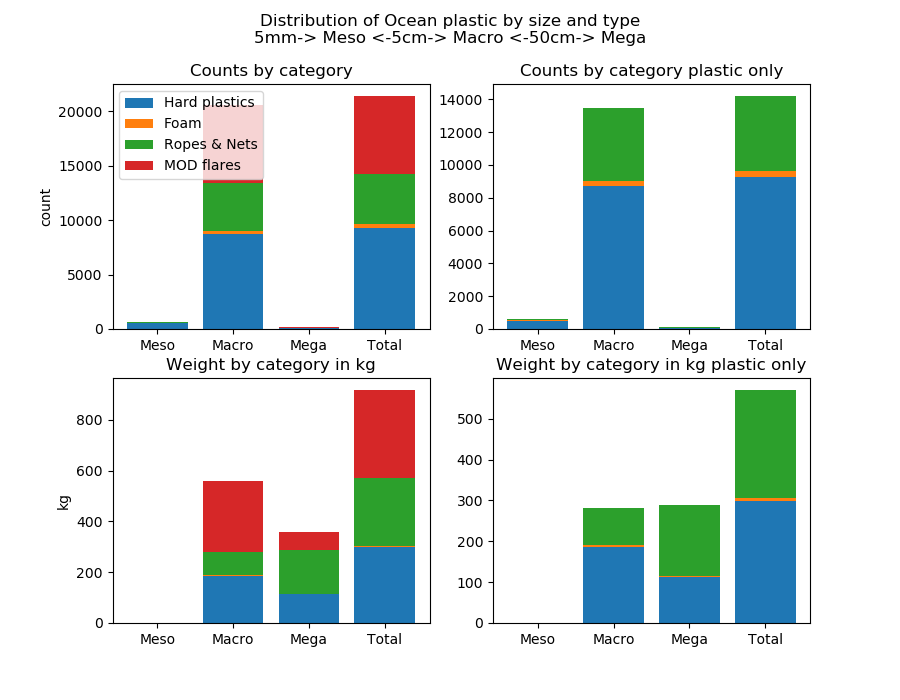

[Text(0, 0, 'Meso'),
 Text(0, 0, 'Macro'),
 Text(0, 0, 'Mega'),
 Text(0, 0, 'Total')]

In [240]:
count_file, weight_file=workdir+'Conor_count.csv', workdir+'Conor_weight.csv'
counts_C, weights_C=np.genfromtxt(count_file, delimiter='\t', skip_header=1, usecols=range(2,14)),\
                    np.genfromtxt(weight_file, delimiter='\t', skip_header=1, usecols=range(2,14))

#print(weights_C)
fig_cat, ax_cat=plt.subplots(2,2, figsize=(9,7))
fig_cat.suptitle('Distribution of Ocean plastic by size and type\n5mm-> Meso <-5cm-> Macro <-50cm-> Mega')

label=['Meso','Macro','Mega','Total']
ind=np.arange(len(label))
graph_counts, graph_weights=np.zeros((4,len(label))), np.zeros((4,len(label)))
for i in range(4):
    graph_counts[i,:-1] = counts_C[:,i::4].sum(axis=0)
    graph_weights[i,:-1]= weights_C[:,i::4].sum(axis=0)
graph_counts[:,-1]=graph_counts[:,:-1].sum(axis=1)
graph_weights[:,-1]=graph_weights[:,:-1].sum(axis=1)
#print(graph_counts)

ax_cat[0,0].bar(ind, graph_counts[0], label='Hard plastics')
ax_cat[0,0].bar(ind, graph_counts[2], bottom=graph_counts[0], label='Foam')
ax_cat[0,0].bar(ind, graph_counts[1], bottom= graph_counts[0]+graph_counts[2]
                ,label='Ropes & Nets')
ax_cat[0,0].bar(ind, graph_counts[3], bottom=graph_counts[0]+graph_counts[2]+
                graph_counts[1], label='MOD flares')
ax_cat[0,0].set_title('Counts by category')
ax_cat[0,0].set_xticks(ind)
ax_cat[0,0].set_xticklabels(label)
ax_cat[0,0].legend()
ax_cat[0,0].set_ylabel('count')

ax_cat[1,0].bar(ind, graph_weights[0], label='Hard plastics')
ax_cat[1,0].bar(ind, graph_weights[2], bottom=graph_weights[0], label='Foam')
ax_cat[1,0].bar(ind, graph_weights[1], bottom=graph_weights[2]
                +graph_weights[0], label='Rope & Nets')
ax_cat[1,0].bar(ind, graph_weights[3], bottom=graph_weights[0]
                +graph_weights[2]+graph_weights[1], label='MOD flares')
ax_cat[1,0].set_title('Weight by category in kg')
ax_cat[1,0].set_xticks(ind)
ax_cat[1,0].set_xticklabels(label)
ax_cat[1,0].set_ylabel('kg')
# ax_cat[1,0].legend()

ax_cat[0,1].bar(ind, graph_counts[0], label='Hard')
ax_cat[0,1].bar(ind, graph_counts[2], bottom=graph_counts[0], label='Foam')
ax_cat[0,1].bar(ind, graph_counts[1], bottom=graph_counts[0]
                +graph_counts[2], label='Nets')
ax_cat[0,1].set_title('Counts by category plastic only')
ax_cat[0,1].set_xticks(ind)
ax_cat[0,1].set_xticklabels(label)
#ax_cat[0,1].legend()

ax_cat[1,1].bar(ind, graph_weights[0], label='Hard')
ax_cat[1,1].bar(ind, graph_weights[2], bottom=graph_weights[0], label='Foam')
ax_cat[1,1].bar(ind, graph_weights[1], bottom=graph_weights[0]
                +graph_weights[2], label='Nets')
ax_cat[1,1].set_title('Weight by category in kg plastic only')
ax_cat[1,1].set_xticks(ind)
ax_cat[1,1].set_xticklabels(label)
#ax_cat[1,1].legend()
#fig_cat.tight_layout()

In [21]:
dates=np.array([dt.datetime.strptime(d, "%Y-%m-%d") for d in dates])
weight=np.array(weight)
delta=dates[1:]-dates[:-1]
datev = dates[:-1]+delta/2
rates=(weight[1:]/(delta/dt.timedelta(days=1))).astype(np.float)
init = dates[0].year
dv= np.zeros(len(datev))

for i in range(len(datev)):
    dv[i]= fractions(init, datev[i])

host=np.arange(0, int(dv[-1])+1,1/(365.25*3))
intrates =np.interp(host,dv,rates)
intrates[host<dv[0]-.001], intrates[host>dv[-1]+.001] = 0,0 #zeroing interpolated data
N, M=15, 73
bins= np.linspace(0,2*np.pi,N, endpoint=False)
norm=np.zeros(N)
nrows, ncols = 1, 2

<IPython.core.display.Javascript object>


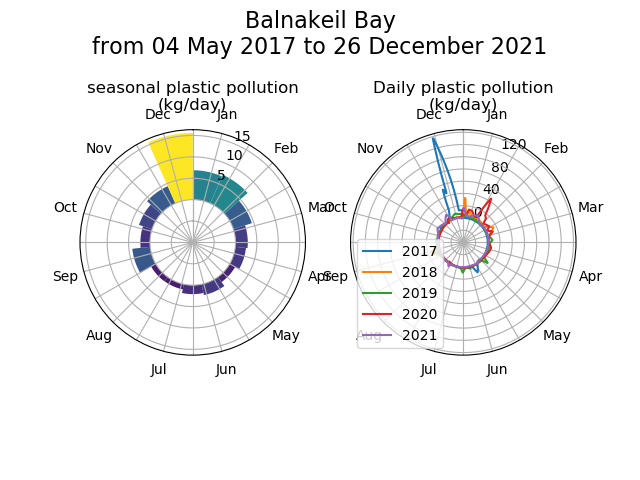

In [23]:


fig, axe = plt.subplots(nrows=nrows, ncols=ncols, subplot_kw=dict(polar=True))
fig.suptitle("Balnakeil Bay\nfrom {} to {}".format(dates[0].strftime("%d %B %Y"), dates[-1].strftime("%d %B %Y")), fontsize=16)


for c  in range(int(dv[-1]+1)):
    logic = (host>=c) & (host<c+1)
    for i in range(N):
        norm[i]+=intrates[logic][M*i:M*(i+1)].sum()
    #axe[0].plot(host[logic]*2*np.pi,np.log10(intrates[logic]),label =init+c)
    axe[1].plot(host[logic]*2*np.pi,intrates[logic],label =init+c)

norm /=c*M
bars = axe[0].bar(bins, norm, width=bins[1], align="edge", bottom=0, label="3 weeks sum")
for j in range(len(bars)):
    bars[j].set_facecolor(plt.cm.viridis(norm[j]/norm.max()))

axe[0].set_rticks(np.arange(-10,16,5))
axe[0].set_yticklabels(['','','','5','10','15'])#axes[1].set_rscale("log")
axe[0].set_title("seasonal plastic pollution\n(kg/day)")
axe[1].set_rticks(np.arange(-40,150,20))
axe[1].set_yticklabels(['','','0','','40','','80','','120'])#axes[1].set_rscale("log")
axe[1].set_title("Daily plastic pollution\n(kg/day)")
for ax in axe:
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_xticks(np.linspace(0,2*np.pi,25))
    ax.set_xticklabels(['','Jan','','Feb','','Mar','','Apr','', 'May','','Jun','','Jul','', 'Aug','', 'Sep','','Oct','','Nov','','Dec',''])
axe[1].legend()